# Project Description

**1. The data set I have chosen**: 
I would like to work with the Text-Fabric BHSa data that was developed by ETCBC (Eep Talstra Center of Bible and Computing: http://etcbc.nl/) at the Free University of Amsterdam. In my doctoral and post-doctoral studies I have worked with the ETCBC database and contributed to it with a computer driven text-syntactical analysis of Jeremiah (https://www.nwo.nl/en/research-and-results/research-projects/i/23/1523.html, https://www.nwo.nl/en/research-and-results/research-projects/i/54/5954.html). Until 2014 the ETCBC database was only accessible via the solaris research terminals and did not have any pleasant representations on the web. In 2012-2014 I was part of the team that created https://shebanq.ancient-data.org/ making the ETCBC database available for a wide audience. Part of the project was to transform the MdF database (Monad dot Feature) into a the standardized LAF format (Linguistic Annotation Format). While I was responsible to work on the transformation with the Max Plank Institute at Nijmegen, a web friendly representation with search functionality was implemented by other team members. Once SHEBANQ was successfully received by the scholarly community (we won the digital humanity award in 2014) I left Amsterdam and missed the further developments. From 2016 on the ETCBC database in its LAF format and the MQL query language (used by SHEBANQ) was further developed into a python module and app called “Text Fabric” (https://annotation.github.io/text-fabric/). With this move the ETCBC database was opened for researchers who want to process the data with python tools.

**2. The data is found at the URL**:
https://annotation.github.io/text-fabric/ see also https://shebanq.ancient-data.org/

## Method

**1. Learning Py Text-Fabric**:
I would first like to know/learn how to translate MQL queries into python’s Text-Fabric queries. While I am well acquainted with writing MQL queries (see e.g. https://shebanq.ancient-data.org/hebrew/query?version=4b&id=2666) I cannot yet write Text-Fabric queries within python (using jupyter notebooks).

**2. Searching WeQatal Clauses**:
Once I know how to write Text-Fabric queries within a jupyter notebook I would like to search for all WeQatal clause-types. “WeQatal” is a Hebrew tense whose function is still debated among scholars. In some cases, it should be translated as imperatives, in others as simple past tense, and again in other cases as present tense. Different models and theories have been developed in order to tackle WeQatal’s “unpredictability” (cf. [Van der Merwe, Christo H. J., Jacobus A. Naudé, and Jan H. Kroeze. *A Biblical Hebrew Reference Grammar*. Second Edition. London; Oxford; New York; New Delhi; Sydney: Bloomsbury; Bloomsbury T&T Clark: An Imprint of Bloomsbury Publishing Plc, 2017. §21.3](https://app.logos.com/books/LLS%3ABHRG2ED/references/bhrg.21.3)). In my experience with the WeQatal tense I assume that the verbal form does not have an intrinsic tense but inherits it from the previous finite verbal form. Thus, if the previous form was an imperative, the WeQatal form will continue the imperative meaning. If the previous tense was a yiqtol (similar to the English present tense), then the WeQatal form will continue the yiqtol meaning (i.e. should be translated as present tense). I then want to test wether my experience can be backed up with data.

**3. Classifying the *formal* WeQatal clause relations (phenomenological approach)**:
Finding all WeQatal clauses will still make research into the nature of WeQatal forms difficult. Therefore, I would like to classify all WeQatal forms by their preceding finite verbal form. In order to reduce complexity, I will search for all independent verbal clauses that directly precede the clause containing the WeQatal form and highlight the finite verbal form appearing in the preceding independent clause. I hope to graphically represent this classification with some plotting functions.


**4. Classifying the *functional* WeQatal clause relations (interpretative approach)**:
After having classified the formal relations between WeQatal clauses and their preceiding clauses I want to investigate whether one can find a match between form and function. I thus have to analyze clause relations and suggest - if possible - a consistent form-function relation.

**5. Calculating Probabilities**:
Finally, I would like to experiment with some probability functions. Here I would like to see with what probability one can expect the WeQatal forms to have certain functions (e.g. tense meanings). 


## Skills to be developed

**1. MQL query:** 
Since I am well acquainted with the MQL query language I intend to first write my ETCBC queries in SHEBANQ so that I have a clear understanding of what the query should look for and what the outputs should be.

**2. TF Query Language:**
Once my MQL queries and query output satisfies my needs I will learn the TF query language and transform the MQL queries into TF queries and make sure that I am getting the same results (both query languages run on the same ETCBC database, thus the queries should generate the same results). For the TF queries I will use a jupyter notebook.

**3. From TF Query Results to Dataframing:**
After successfully having written TF queries in a jupyter notebook I will have to learn how to transform TF query outputs into a pandas dataframe.

**4. Creating Graphical Representations:**
With the TF query result in the form of a pandas dataframe I seek to create some meaningful graphical representations that communicate distribution of all “preceding finite verbal form => WeQatal”-pairs.

**5. Clause-relational Probabilities:**
Once the distribution of pairs (both formal as well as functional) is calculated I should be able to use python’s statistics function and python’s probability function in order to illustrate the likelihood of certain WeQatal pairs.

# Generating Data
## The MQL way with SHEBANQ

In the MQL Query I am searching for two simple sentences, i.e. sentences that contain only one independent clause. I want the second clause to be a WeQatal clause (WQt0 [clause without explicit subject], WQtX [clause with explicit subject]). 
The reason for this query is to explore what functional relation (tense relation?) is established between the WeQatal form and the preceding verbal form of the prior sentence.
Obviously, I am excluding WeQatal clauses for the first sentence. I, therefore specify the type of the initial clause to be any independent clause. I do this by: (1) defining a list of clause types that can also be potentially independent; (2) excluding WeQatal clauses; (3) and restricting the composition of the sentence by it having only one clause. Whith these conditions I guarantee that only independent clauses will be found. 
In the query I highlight the predicates.

The query looks like this:
```
select all objects where
[sentence
    [clause FIRST AND LAST typ IN (NmCl, Ptcp, WIm0, WImX, WXIm, WXQt, WXYq, WYq0, WYqX, Way0, WayX, WxI0, WxYX, WxQ0, WxQX, WxY0, WxYX, XImp, XQtl, xYq0, ZIm0, ZImX, ZQt0, ZQtX, ZYq0, ZYqX, xImX, xQt0, xQtX, xYq0, xYqX)
        [phrase FOCUS function IN (Pred, PreC, PreO, PreS, PtcO)]
    ]
]
[sentence
    [clause FIRST AND LAST typ IN (WQt0, WQtX)
        [phrase FOCUS function IN (Pred, PreC, PreO, PreS)]
    ]
]  
```


See the results here: https://shebanq.ancient-data.org/hebrew/query?version=2017&id=3096

## The Text Fabric way with Python
### Loading tf.fabric and tf.app

In [1]:
# First, I have to laod different modules that we use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

After having loaded the TF app I need to load the Biblia Hebraica Stuttgartensia ```bhsa``` as a dataset that TF can work with.

In [2]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... connected
Using TF-app in C:\Users\oglan/text-fabric-data/annotation/app-bhsa/code:
	rv1.0=#d3cf8f0c2ab5d690a0fda14ea31c33da5c5c8483 (latest release)
	connecting to online GitHub repo etcbc/bhsa ... connected
Using data in C:\Users\oglan/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 (latest release)
	connecting to online GitHub repo etcbc/phono ... connected
Using data in C:\Users\oglan/text-fabric-data/etcbc/phono/tf/c:
	r1.2 (latest release)
	connecting to online GitHub repo etcbc/parallels ... connected
Using data in C:\Users\oglan/text-fabric-data/etcbc/parallels/tf/c:
	r1.2 (latest release)


### Writing the TF query

After having learned how to write TF queries, I can transform the MQL query (SHEBANQ) as a TF query.

In [3]:
queryAllrelations = '''
sentence      
     :: clause typ=NmCl|Ptcp|WIm0|WImX|WXIm|WXQt|WXYq|WYq0|WYqX|Way0|WayX|WxI0|WxYX|WxQ0|WxQX|WxY0|WxYX|XImp|XQtl|xYq0|ZIm0|ZImX|ZQt0|ZQtX|ZYq0|ZYqX|xImX|xQt0|xQtX|xYq0|xYqX
           phrase function=Pred|PreC|PreO|PreS|PtcO
               word vt*
<: sentence
     :: clause typ=WQt0|WQtX
           phrase function=Conj
           <: phrase function=Pred|PreC|PreO|PreS|
               word vt*
'''

# I need to add the line "word vt*" as it allows me to get access to the tense information of the predicates appearing in s1.
# "::" defines that the clause starts and ends exactly where the sentence starts and ends.
# "<:" defines that the element X (<: X) follows directly after the previous element.

Before the bug I reported ("<:" did not function with subsequent elements when both elements were not contained in a larger container), I had to write the query in the following way:

```
s1:sentence      
   :: clause typ=NmCl|Ptcp|WIm0|WImX|WXIm|WXQt|WXYq|WYq0|WYqX|Way0|WayX|WxI0|WxYX|WxQ0|WxQX|WxY0|WxYX|XImp|XQtl|xYq0|ZIm0|ZImX|ZQt0|ZQtX|ZYq0|ZYqX|xImX|xQt0|xQtX|xYq0|xYqX
         phrase function=Pred|PreC|PreO|PreS|PtcO
             word vt*
s2:sentence
    :: clause typ=WQt0|WQtX
          p1:phrase function=Conj
          p2:phrase function=Pred|PreC|PreO|PreS|
              word vt*
s1 <: s2
p1 <: p2
```

This still works. But I can reduce the lines of query writing after the bug has been fixed.

**s1** creates a reference for this particular sentence. This allows later to specify the relation between the two sentences.

**s1 <: s2** defines that s2 needs to follow (<) right after (:) s1.

**p1 <: p2** defines that p2 needs to follow (<) right after (:) p1. I do this in order to have the "W" conjunction highlighted in the results

See the reported bug with its fix being described under "Fix in query parsing" here: https://annotation.github.io/text-fabric/About/News/

### Showing the TF Query Results

In order to use TF's search function I need to use the function ```A.search```.


The "A" version of the search "collects all results and sorts them in the canonical order. (but you can change the sorting, see the sort parameter). It then reports the number of results." (https://annotation.github.io/text-fabric/Api/App/)

In [4]:
resultsAllrelations = A.search(queryAllrelations)

  1.89s 2155 results


In order to show the search results I need to use the TF function ```A.show```.
There are many features one can use to manipulate the ```A.show``` function. I have learned to use a couple of them (```start```, ```end```, ```linked```, ```condensed```, ```withNodes```, ```extraFeatures```, ```colorMap```)

In [5]:
A.show(resultsAllrelations, start=1, end=2, linked=4, condensed=True, withNodes=True, extraFeatures=("nu", "gn"), colorMap={1: 'yellow', 2: 'cyan', 3: 'magenta', 4: 'yellow', 5: 'cyan', 6: 'magenta', 7: 'magenta', })

For my purpose it is much easier to use a table format for showing and working with the results. In order to do so I need to use the ```A.table``` function.

In [7]:
A.table(resultsAllrelations, start=1, end=2, linked=4, withNodes=True, colorMap={1: 'yellow', 2: 'cyan', 3: 'magenta', 4: 'yellow', 5: 'cyan', 6: 'magenta', 7: 'magenta', })

n,p,sentence,clause,phrase,word,sentence,clause,phrase,phrase,word
1,Genesis 2:6,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ 1172392,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ 427698,יַֽעֲלֶ֣ה 651976,יַֽעֲלֶ֣ה 780,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃ 1172393,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃ 427699,וְ 651978,הִשְׁקָ֖ה 651979,הִשְׁקָ֖ה 785
2,Genesis 2:10,וּמִשָּׁם֙ יִפָּרֵ֔ד 1172400,וּמִשָּׁם֙ יִפָּרֵ֔ד 427713,יִפָּרֵ֔ד 652029,יִפָּרֵ֔ד 876,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃ 1172401,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃ 427714,וְ 652030,הָיָ֖ה 652031,הָיָ֖ה 878


In [8]:
# here I am just trying the "A.pretty" function of TF.
wordshow = (651979, 651976)
for word in wordshow:
 A.pretty(word, extraFeatures=("nu", "gn"))

### Create a pandas DataFrame
#### Exporting TF Query Results
After having created a successful query with the needed results I am going to export my results as a tab sperated file with TF's export function ```A.export```.

In [9]:
A.export(resultsAllrelations, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='WeQatal_AllRelations.tsv')

Once the TF search results have been exported as a tsv file we can import them as a pandas dataframe.

In [10]:
queryresults=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/WeQatal_AllRelations.tsv',delimiter='\t',encoding='utf-16')

In [11]:
queryresults.head(20)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,...,TEXT7,function7,NODE8,TYPE8,TEXT8,function8,NODE9,TYPE9,TEXT9,vt9
0,1,Genesis,2,6,1172392,sentence,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,427698,clause,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,...,וְ,Conj,651979,phrase,הִשְׁקָ֖ה,Pred,785,word,הִשְׁקָ֖ה,perf
1,2,Genesis,2,10,1172400,sentence,וּמִשָּׁם֙ יִפָּרֵ֔ד,427713,clause,וּמִשָּׁם֙ יִפָּרֵ֔ד,...,וְ,Conj,652031,phrase,הָיָ֖ה,Pred,878,word,הָיָ֖ה,perf
2,3,Genesis,2,24,1172435,sentence,עַל־כֵּן֙ יַֽעֲזָב־אִ֔ישׁ אֶת־אָבִ֖יו וְאֶת־אִ...,427764,clause,עַל־כֵּן֙ יַֽעֲזָב־אִ֔ישׁ אֶת־אָבִ֖יו וְאֶת־אִ...,...,וְ,Conj,652179,phrase,דָבַ֣ק,Pred,1149,word,דָבַ֣ק,perf
3,4,Genesis,3,18,1172501,sentence,וְקֹ֥וץ וְדַרְדַּ֖ר תַּצְמִ֣יחַֽ לָ֑ךְ,427852,clause,וְקֹ֥וץ וְדַרְדַּ֖ר תַּצְמִ֣יחַֽ לָ֑ךְ,...,וְ,Conj,652433,phrase,אָכַלְתָּ֖,Pred,1537,word,אָכַלְתָּ֖,perf
4,5,Genesis,3,22,1172514,sentence,פֶּן־יִשְׁלַ֣ח יָדֹ֗ו,427867,clause,פֶּן־יִשְׁלַ֣ח יָדֹ֗ו,...,וְ,Conj,652480,phrase,לָקַח֙,Pred,1610,word,לָקַח֙,perf
5,6,Genesis,4,14,1172564,sentence,וּמִפָּנֶ֖יךָ אֶסָּתֵ֑ר,427928,clause,וּמִפָּנֶ֖יךָ אֶסָּתֵ֑ר,...,וְ,Conj,652665,phrase,הָיִ֜יתִי,Pred,1895,word,הָיִ֜יתִי,perf
6,7,Genesis,6,14,1172704,sentence,קִנִּ֖ים תַּֽעֲשֶׂ֣ה אֶת־הַתֵּבָ֑ה,428102,clause,קִנִּ֖ים תַּֽעֲשֶׂ֣ה אֶת־הַתֵּבָ֑ה,...,וְ,Conj,653227,phrase,כָֽפַרְתָּ֥,Pred,2861,word,כָֽפַרְתָּ֥,perf
7,8,Genesis,7,4,1172728,sentence,כִּי֩ לְיָמִ֨ים עֹ֜וד שִׁבְעָ֗ה אָֽנֹכִי֙ מַמְ...,428143,clause,כִּי֩ לְיָמִ֨ים עֹ֜וד שִׁבְעָ֗ה אָֽנֹכִי֙ מַמְ...,...,וּ,Conj,653353,phrase,מָחִ֗יתִי,Pred,3121,word,מָחִ֗יתִי,perf
8,9,Genesis,9,13,1172839,sentence,אֶת־קַשְׁתִּ֕י נָתַ֖תִּי בֶּֽעָנָ֑ן,428300,clause,אֶת־קַשְׁתִּ֕י נָתַ֖תִּי בֶּֽעָנָ֑ן,...,וְ,Conj,653875,phrase,הָֽיְתָה֙,Pred,4271,word,הָֽיְתָה֙,perf
9,10,Genesis,12,3,1173007,sentence,וּמְקַלֶּלְךָ֖ אָאֹ֑ר,428513,clause,וּמְקַלֶּלְךָ֖ אָאֹ֑ר,...,וְ,Conj,654538,phrase,נִבְרְכ֣וּ,Pred,5525,word,נִבְרְכ֣וּ,perf


Obviously I cannot see the content of all columns. Therefore, I am using the ```set_option``` function to change the ```display.max_columns``` default to 38 columns.

In [12]:
pd.set_option('display.max_columns', 38)

In [13]:
queryresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,typ2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,vt4,NODE5,TYPE5,TEXT5,NODE6,TYPE6,TEXT6,typ6,NODE7,TYPE7,TEXT7,function7,NODE8,TYPE8,TEXT8,function8,NODE9,TYPE9,TEXT9,vt9
0,1,Genesis,2,6,1172392,sentence,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,427698,clause,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WXYq,651976,phrase,יַֽעֲלֶ֣ה,Pred,780,word,יַֽעֲלֶ֣ה,impf,1172393,sentence,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,427699,clause,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,WQt0,651978,phrase,וְ,Conj,651979,phrase,הִשְׁקָ֖ה,Pred,785,word,הִשְׁקָ֖ה,perf
1,2,Genesis,2,10,1172400,sentence,וּמִשָּׁם֙ יִפָּרֵ֔ד,427713,clause,וּמִשָּׁם֙ יִפָּרֵ֔ד,WxY0,652029,phrase,יִפָּרֵ֔ד,Pred,876,word,יִפָּרֵ֔ד,impf,1172401,sentence,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,427714,clause,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,WQt0,652030,phrase,וְ,Conj,652031,phrase,הָיָ֖ה,Pred,878,word,הָיָ֖ה,perf


In [14]:
queryresults.shape

(2155, 38)

As one can see the number of rows (2155) of the DF is identical to the number of rows put out by the TF query.

However, with a total of 2155 rows and 38 columns, we need to do some cleaning and simplification so that we bring the output into such a format that we can analyze it efficiently.

#### Creating and Cleaning the DataFrame

While exploring the data, I found that some cleaning is necessary. Since some predicate complement (PreC) phrases contain more than one word, they are registered as seperate search results (see the output for the next command line ```queryresults[29:36]```). See for example Gen 20:11. In that case the PreC is made out of 5 words (ב, ה, מקום, ה, זה). This results in 5 listings although all of these 5 listings represent only 1 case. This is not a mistake of TF but a consequence of my query line ``` word vt*```.

Since my query seeks to find each word within a predicate phrase
```
         phrase function=Pred|PreC|PreO|PreS|PtcO
             word vt*
```

it needs to output the results multiple times if there are more than 1 words. This would not happen were I to write:
```
         phrase function=Pred|PreC|PreO|PreS|PtcO
```

But since I am interested in the verbal tense of the verbal predicate I have to keep line ```word vt*```

In [15]:
queryresults[29:36]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,typ2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,vt4,NODE5,TYPE5,TEXT5,NODE6,TYPE6,TEXT6,typ6,NODE7,TYPE7,TEXT7,function7,NODE8,TYPE8,TEXT8,function8,NODE9,TYPE9,TEXT9,vt9
29,30,Genesis,19,19,1173536,sentence,פֶּן־תִּדְבָּקַ֥נִי הָרָעָ֖ה,429205,clause,פֶּן־תִּדְבָּקַ֥נִי הָרָעָ֖ה,xYqX,656619,phrase,תִּדְבָּקַ֥נִי,PreO,8863,word,תִּדְבָּקַ֥נִי,impf,1173537,sentence,וָמַֽתִּי׃,429206,clause,וָמַֽתִּי׃,WQt0,656621,phrase,וָ,Conj,656622,phrase,מַֽתִּי׃,Pred,8867,word,מַֽתִּי׃,perf
30,31,Genesis,20,11,1173640,sentence,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,429333,clause,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,NmCl,657020,phrase,בַּמָּקֹ֖ום הַזֶּ֑ה,PreC,9477,word,בַּ,NaN,1173641,sentence,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,429334,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,WQt0,657021,phrase,וַ,Conj,657022,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,perf
31,32,Genesis,20,11,1173640,sentence,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,429333,clause,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,NmCl,657020,phrase,בַּמָּקֹ֖ום הַזֶּ֑ה,PreC,9478,word,NaN,NaN,1173641,sentence,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,429334,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,WQt0,657021,phrase,וַ,Conj,657022,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,perf
32,33,Genesis,20,11,1173640,sentence,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,429333,clause,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,NmCl,657020,phrase,בַּמָּקֹ֖ום הַזֶּ֑ה,PreC,9479,word,מָּקֹ֖ום,NaN,1173641,sentence,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,429334,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,WQt0,657021,phrase,וַ,Conj,657022,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,perf
33,34,Genesis,20,11,1173640,sentence,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,429333,clause,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,NmCl,657020,phrase,בַּמָּקֹ֖ום הַזֶּ֑ה,PreC,9480,word,הַ,NaN,1173641,sentence,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,429334,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,WQt0,657021,phrase,וַ,Conj,657022,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,perf
34,35,Genesis,20,11,1173640,sentence,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,429333,clause,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,NmCl,657020,phrase,בַּמָּקֹ֖ום הַזֶּ֑ה,PreC,9481,word,זֶּ֑ה,NaN,1173641,sentence,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,429334,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,WQt0,657021,phrase,וַ,Conj,657022,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,perf
35,36,Genesis,22,17,1173831,sentence,וְיִרַ֣שׁ זַרְעֲךָ֔ אֵ֖ת שַׁ֥עַר אֹיְבָֽיו׃,429567,clause,וְיִרַ֣שׁ זַרְעֲךָ֔ אֵ֖ת שַׁ֥עַר אֹיְבָֽיו׃,WYqX,657757,phrase,יִרַ֣שׁ,Pred,10616,word,יִרַ֣שׁ,impf,1173832,sentence,וְהִתְבָּרֲכ֣וּ בְזַרְעֲךָ֔ כֹּ֖ל גֹּויֵ֣י הָא...,429568,clause,וְהִתְבָּרֲכ֣וּ בְזַרְעֲךָ֔ כֹּ֖ל גֹּויֵ֣י הָא...,WQtX,657760,phrase,וְ,Conj,657761,phrase,הִתְבָּרֲכ֣וּ,Pred,10622,word,הִתְבָּרֲכ֣וּ,perf


There are two ways of preventing these duplicates. 
1. Either one does some hand coding before the ```A.export``` function is used.
2. Or one does use pandas ```drop_duplicates``` function. 

I will use the latter since I do not yet know how to handcode the first option.

#### Cleaning Up the DataFrame
Since I know the duplicates can be identified within the "NODE" ID columns (see 5x NODE1 ID 1173640) I run the function ```drop_duplicates``` only on that column to delete duplicate rows. However, since nominal clauses can appear in cl#1 I focus on the NODE IDs of the cl#2, choosing the clause NODE ID "NODE6".

In [16]:
QRdropdupl = queryresults.drop_duplicates(['NODE6'])

Lets see whether we got rid of our duplicates for Gen 20:11.

In [17]:
QRdropdupl[24:27]

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,typ2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,vt4,NODE5,TYPE5,TEXT5,NODE6,TYPE6,TEXT6,typ6,NODE7,TYPE7,TEXT7,function7,NODE8,TYPE8,TEXT8,function8,NODE9,TYPE9,TEXT9,vt9
29,30,Genesis,19,19,1173536,sentence,פֶּן־תִּדְבָּקַ֥נִי הָרָעָ֖ה,429205,clause,פֶּן־תִּדְבָּקַ֥נִי הָרָעָ֖ה,xYqX,656619,phrase,תִּדְבָּקַ֥נִי,PreO,8863,word,תִּדְבָּקַ֥נִי,impf,1173537,sentence,וָמַֽתִּי׃,429206,clause,וָמַֽתִּי׃,WQt0,656621,phrase,וָ,Conj,656622,phrase,מַֽתִּי׃,Pred,8867,word,מַֽתִּי׃,perf
30,31,Genesis,20,11,1173640,sentence,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,429333,clause,רַ֚ק אֵין־יִרְאַ֣ת אֱלֹהִ֔ים בַּמָּקֹ֖ום הַזֶּ֑ה,NmCl,657020,phrase,בַּמָּקֹ֖ום הַזֶּ֑ה,PreC,9477,word,בַּ,NaN,1173641,sentence,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,429334,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,WQt0,657021,phrase,וַ,Conj,657022,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,perf
35,36,Genesis,22,17,1173831,sentence,וְיִרַ֣שׁ זַרְעֲךָ֔ אֵ֖ת שַׁ֥עַר אֹיְבָֽיו׃,429567,clause,וְיִרַ֣שׁ זַרְעֲךָ֔ אֵ֖ת שַׁ֥עַר אֹיְבָֽיו׃,WYqX,657757,phrase,יִרַ֣שׁ,Pred,10616,word,יִרַ֣שׁ,impf,1173832,sentence,וְהִתְבָּרֲכ֣וּ בְזַרְעֲךָ֔ כֹּ֖ל גֹּויֵ֣י הָא...,429568,clause,וְהִתְבָּרֲכ֣וּ בְזַרְעֲךָ֔ כֹּ֖ל גֹּויֵ֣י הָא...,WQtX,657760,phrase,וְ,Conj,657761,phrase,הִתְבָּרֲכ֣וּ,Pred,10622,word,הִתְבָּרֲכ֣וּ,perf


After we got rid of the duplicates we should get the correct number of search results.

In [18]:
QRdropdupl.shape

(1801, 38)

After deleting the duplicates it is clear that there is still much information present that is not useful for our purpose. I will therefore delete several columns. Again, this could be prevented through hand coding before one does actually use the ```A.export``` function.

I will use the ```filter``` function and the ```drop``` function to accomplish this.

In [19]:
# for quicker writing
QR = QRdropdupl

# defining the columns to be dropped
dropNODEcols = QR.filter(regex='NODE').columns

# now dropping the columns
QRclean = QR.drop(dropNODEcols, axis=1)
QRclean.head(2)

,R,S1,S2,S3,TYPE1,TEXT1,TYPE2,TEXT2,typ2,TYPE3,TEXT3,function3,TYPE4,TEXT4,vt4,TYPE5,TEXT5,TYPE6,TEXT6,typ6,TYPE7,TEXT7,function7,TYPE8,TEXT8,function8,TYPE9,TEXT9,vt9
0,1,Genesis,2,6,sentence,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,clause,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WXYq,phrase,יַֽעֲלֶ֣ה,Pred,word,יַֽעֲלֶ֣ה,impf,sentence,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,clause,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,WQt0,phrase,וְ,Conj,phrase,הִשְׁקָ֖ה,Pred,word,הִשְׁקָ֖ה,perf
1,2,Genesis,2,10,sentence,וּמִשָּׁם֙ יִפָּרֵ֔ד,clause,וּמִשָּׁם֙ יִפָּרֵ֔ד,WxY0,phrase,יִפָּרֵ֔ד,Pred,word,יִפָּרֵ֔ד,impf,sentence,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,clause,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,WQt0,phrase,וְ,Conj,phrase,הָיָ֖ה,Pred,word,הָיָ֖ה,perf


In [20]:
# I will also delete the sentence information since its doublicated
dropSNTcols = ['TYPE1', 'TEXT1', 'TYPE2', 'TEXT3',  'TYPE3', 'TYPE4', 'TYPE5', 'TYPE6', 'TEXT5', 'TYPE7', 'TEXT7', 'function7', 'TYPE8', 'TEXT8', 'TYPE9']

# now dropping the columns
QRclean = QRclean.drop(dropSNTcols, axis=1)
QRclean.head(2)

,R,S1,S2,S3,TEXT2,typ2,function3,TEXT4,vt4,TEXT6,typ6,function8,TEXT9,vt9
0,1,Genesis,2,6,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WXYq,Pred,יַֽעֲלֶ֣ה,impf,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,WQt0,Pred,הִשְׁקָ֖ה,perf
1,2,Genesis,2,10,וּמִשָּׁם֙ יִפָּרֵ֔ד,WxY0,Pred,יִפָּרֵ֔ד,impf,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,WQt0,Pred,הָיָ֖ה,perf


To achieve more clarity about the column information I change the name of the column headers.

In [21]:
QRclean.columns = ['order', 'book', 'chp', 'vrs', 'cl1Txt', 'cl1Typ', 'cl1PredTyp', 'cl1PredTxt', 'cl1PredVt', 'cl2Txt', 'cl2Typ', 'cl2PredTyp', 'cl2PredTxt', 'cl2PredVt']
QRclean.head(2)

,order,book,chp,vrs,cl1Txt,cl1Typ,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2Txt,cl2Typ,cl2PredTyp,cl2PredTxt,cl2PredVt
0,1,Genesis,2,6,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WXYq,Pred,יַֽעֲלֶ֣ה,impf,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,WQt0,Pred,הִשְׁקָ֖ה,perf
1,2,Genesis,2,10,וּמִשָּׁם֙ יִפָּרֵ֔ד,WxY0,Pred,יִפָּרֵ֔ד,impf,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,WQt0,Pred,הָיָ֖ה,perf


Now I reorganize the position of the columns so that comparisons between the different clause types are easier.

In [22]:
QRclean = QRclean[['order', 'book', 'chp', 'vrs', 'cl1Typ', 'cl1Txt', 'cl2Typ', 'cl2Txt', 'cl1PredTyp', 'cl1PredTxt', 'cl1PredVt', 'cl2PredTyp',  'cl2PredTxt', 'cl2PredVt']]
QRclean.head(2)

,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt
0,1,Genesis,2,6,WXYq,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WQt0,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,Pred,יַֽעֲלֶ֣ה,impf,Pred,הִשְׁקָ֖ה,perf
1,2,Genesis,2,10,WxY0,וּמִשָּׁם֙ יִפָּרֵ֔ד,WQt0,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,Pred,יִפָּרֵ֔ד,impf,Pred,הָיָ֖ה,perf


In [23]:
QRclean.shape

(1801, 14)

Now we have finished preparing our data for analysis.

I am ready to dive into the actual data and do some functional analysis of clause relations.

# Researching the Data
## Initial Investigations
There are different groups of cl-#1 types that we need to sort so that we can share some general statistics of cl-#1=>WeQatal clause relations.

I will first add a new column with ```['count'] = 1``` in which we enter as a default value "1". This will allow us to count column entries easier.

In [24]:
QRclean['count'] = 1
QRclean.head(2)

,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
0,1,Genesis,2,6,WXYq,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WQt0,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,Pred,יַֽעֲלֶ֣ה,impf,Pred,הִשְׁקָ֖ה,perf,1
1,2,Genesis,2,10,WxY0,וּמִשָּׁם֙ יִפָּרֵ֔ד,WQt0,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,Pred,יִפָּרֵ֔ד,impf,Pred,הָיָ֖ה,perf,1


In [25]:
print("The query results in a total of", QRclean[('cl1Typ')].count(),"clauses that are followed by WeQatal.")

The query results in a total of 1801 clauses that are followed by WeQatal.


Now I want to get an idea about the distribution of cl-#1 clause types. Thus I use the ```groupby``` function and then plot the result into a bar graph.

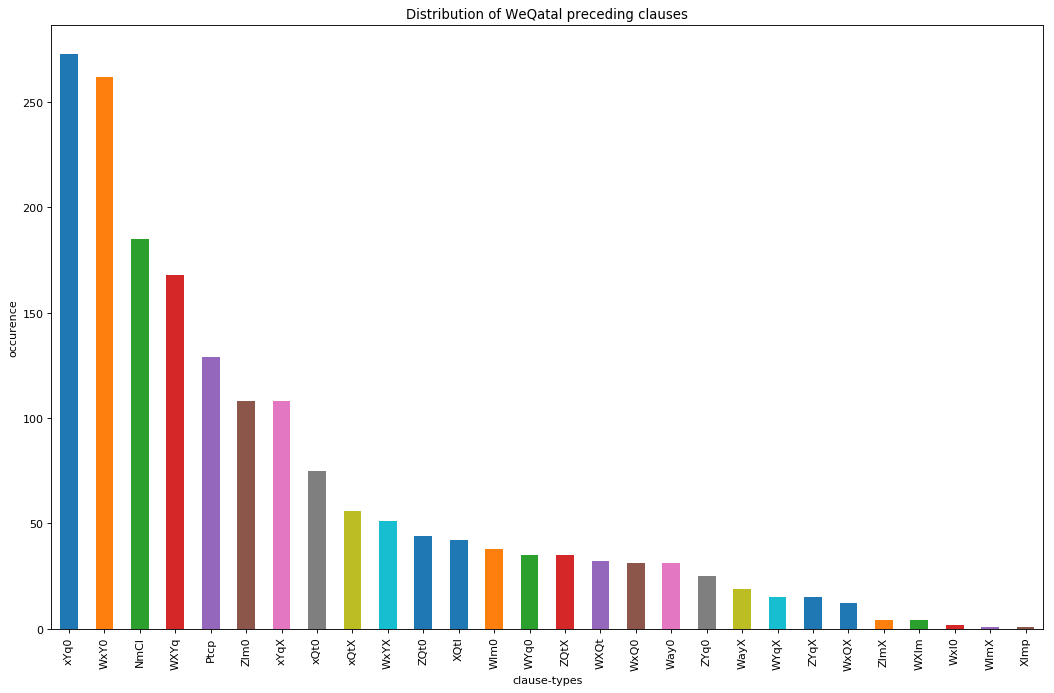

In [26]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
QRclean.groupby('cl1Typ').size().sort_values(ascending=False).plot.bar()
plt.xlabel('clause-types')
plt.ylabel('occurence')
plt.title('Distribution of WeQatal preceding clauses')
plt.show()

 Lets further investigate the table and its coherence by using the ```count``` function.

In [27]:
QRclean.groupby('cl1Typ').count().sort_values('count', ascending=False)

,order,book,chp,vrs,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
cl1Typ,,,,,,,,,,,,,,
xYq0,273,273,273,273,273,273,273,273,273,268,273,273,273,273
WxY0,262,262,262,262,262,262,262,262,262,262,262,262,262,262
NmCl,185,185,185,185,185,185,185,185,185,5,185,185,185,185
WXYq,168,168,168,168,168,168,168,168,168,167,168,168,168,168
Ptcp,129,129,129,129,129,129,129,129,129,129,129,129,129,129
xYqX,108,108,108,108,108,108,108,108,108,103,108,108,108,108
ZIm0,108,108,108,108,108,108,108,108,108,108,108,108,108,108
xQt0,75,75,75,75,75,75,75,75,75,74,75,75,75,75
xQtX,56,56,56,56,56,56,56,56,56,56,56,56,56,56


The bar plotted version of the table looks like this:

## More Cleaning
Akwardly, only the NmCls do not have consistent counts of values in all columns. It appears that while there are 185 NmCls there are 5 predicate phrases with verbal tenses (vt) appearing. Lets see what is going on there by searching only the those NmCl that have verbal forms as predicate.


In [28]:
QRclean.loc[QRclean['cl1Typ'] == 'NmCl'].sort_values(['cl1PredVt', 'order'], ascending=False)

,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
105,106,Exodus,5,16,NmCl,וְהִנֵּ֧ה עֲבָדֶ֛יךָ מֻכִּ֖ים,WQt0,וְחָטָ֥את עַמֶּֽךָ׃,PreC,מֻכִּ֖ים,ptcp,Pred,חָטָ֥את,perf,1
1627,1628,Ezekiel,34,28,NmCl,וְאֵ֥ין מַחֲרִֽיד׃,WQt0,וַהֲקִמֹתִ֥י לָהֶ֛ם מַטָּ֖ע לְשֵׁ֑ם,PreC,מַחֲרִֽיד׃,ptca,Pred,הֲקִמֹתִ֥י,perf,1
1043,1044,2_Kings,7,9,NmCl,וַאֲנַ֣חְנוּ מַחְשִׁ֗ים,WQt0,וְחִכִּ֛ינוּ עַד־אֹ֥ור הַבֹּ֖קֶר,PreC,מַחְשִׁ֗ים,ptca,Pred,חִכִּ֛ינוּ,perf,1
954,955,2_Samuel,12,22,NmCl,מִ֣י יֹודֵ֔עַ,WQtX,וְחַנַּ֥נִי יְהוָ֖ה,PreC,יֹודֵ֔עַ,ptca,PreO,חַנַּ֥נִי,perf,1
642,643,Deuteronomy,4,22,NmCl,וְאַתֶּם֙ עֹֽבְרִ֔ים,WQt0,וִֽירִשְׁתֶּ֕ם אֶת־הָאָ֥רֶץ הַטֹּובָ֖ה הַזֹּֽאת׃,PreC,עֹֽבְרִ֔ים,ptca,Pred,ירִשְׁתֶּ֕ם,perf,1
2116,2117,1_Chronicles,22,18,NmCl,הֲלֹ֨א יְהוָ֤ה אֱלֹֽהֵיכֶם֙ עִמָּכֶ֔ם,WQt0,וְהֵנִ֥יחַ לָכֶ֖ם מִסָּבִ֑יב,PreC,עִמָּכֶ֔ם,NaN,Pred,הֵנִ֥יחַ,perf,1
2107,2108,1_Chronicles,9,26,NmCl,הֵ֖ם הַלְוִיִּ֑ם,WQt0,וְהָיוּ֙ עַל־הַלְּשָׁכֹ֔ות וְעַ֥ל הָאֹצְרֹ֖ות ...,PreC,הַ,NaN,Pred,הָיוּ֙,perf,1
2091,2092,Ezra,3,9,NmCl,בְּנֵי֙ חֵֽנָדָ֔ד בְּנֵיהֶ֥ם וַאֲחֵיהֶ֖ם הַלְו...,WQtX,וְיִסְּד֥וּ הַבֹּנִ֖ים אֶת־הֵיכַ֣ל יְהוָ֑ה,PreC,הַ,NaN,Pred,יִסְּד֥וּ,perf,1
2080,2081,Daniel,11,35,NmCl,כִּי־עֹ֖וד לַמֹּועֵֽד׃,WQtX,וְעָשָׂ֨ה כִרְצֹונֹ֜ו הַמֶּ֗לֶךְ,PreC,לַ,NaN,Pred,עָשָׂ֨ה,perf,1
2064,2065,Daniel,11,28,NmCl,וּלְבָבֹ֖ו עַל־בְּרִ֣ית קֹ֑דֶשׁ,WQt0,וְעָשָׂ֖ה,PreC,עַל־,NaN,Pred,עָשָׂ֖ה,perf,1


Anaylzing the database in SHEBANQ it becomes clear that these cases are actually analysis errors. The participles are both coded as belongig to the *part of speech* "verb" (in the form of ptca/b) **and** to the *phrase dependent part of speech* "subs"(tantives). See:

[bhsa2017 Exodus 5:16](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=v&wactive=hlcustom&wsel_one=gray&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=5&lang=en&book=Exodus&qw=q&tr=hb&tp=txt_p&iid=2666&verse=1&version=2017&mr=m&page=1&c_q3036=red&c_w1AMRv=tropical&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=v&wd1_subpos=v&wd2_person=v&sp_rela=v&wd1_pdp=v&sn_n=v&wd3_uvf=v&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=v&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=v&wd1=v&tl=v&wd3=v&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=v&wd4_statfo=v&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=v&cl_tab=v&wd3_nme=v&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=v&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=v&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=v&sn=v&ht_ht=v&hl_hlv=v&pref=alt)

[bhsa4b Deuteronomy 4:22](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=v&wactive=hlcustom&wsel_one=gray&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=4&lang=en&book=Deuteronomium&qw=q&tr=hb&tp=txt_p&iid=2666&verse=1&version=4b&mr=m&page=1&c_q3036=red&c_w1AMRv=tropical&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=v&wd1_subpos=v&wd2_person=v&sp_rela=v&wd1_pdp=v&sn_n=v&wd3_uvf=v&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=v&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=v&wd1=v&tl=v&wd3=v&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=v&wd4_statfo=v&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=v&cl_tab=v&wd3_nme=v&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=v&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=v&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=v&sn=v&ht_ht=v&hl_hlv=v&pref=alt)

[bhsa2017 2_Samuel 12:22](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=v&wactive=hlcustom&wsel_one=gray&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=12&lang=en&book=Samuel_II&qw=q&tr=hb&tp=txt_p&iid=2666&verse=1&version=2017&mr=m&page=1&c_q3036=red&c_w1AMRv=tropical&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=v&wd1_subpos=v&wd2_person=v&sp_rela=v&wd1_pdp=v&sn_n=v&wd3_uvf=v&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=v&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=v&wd1=v&tl=v&wd3=v&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=v&wd4_statfo=v&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=v&cl_tab=v&wd3_nme=v&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=v&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=v&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=v&sn=v&ht_ht=v&hl_hlv=v&pref=alt)

[bhsa2017 2_Kings 7:9](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=v&wactive=hlcustom&wsel_one=gray&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=7&lang=en&book=Reges_II&qw=q&tr=hb&tp=txt_p&iid=2666&verse=1&version=2017&mr=m&page=1&c_q3036=red&c_w1AMRv=tropical&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=v&wd1_subpos=v&wd2_person=v&sp_rela=v&wd1_pdp=v&sn_n=v&wd3_uvf=v&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=v&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=v&wd1=v&tl=v&wd3=v&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=v&wd4_statfo=v&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=v&cl_tab=v&wd3_nme=v&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=v&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=v&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=v&sn=v&ht_ht=v&hl_hlv=v&pref=alt)

[bhsa2017 Ezekiel 34:28](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=v&wactive=hlcustom&wsel_one=gray&wpub=x&wget=v&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=34&lang=en&book=Ezechiel&qw=q&tr=hb&tp=txt_p&iid=2666&verse=1&version=2017&mr=m&page=1&c_q3036=red&c_w1AMRv=tropical&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=v&wd1_subpos=v&wd2_person=v&sp_rela=v&wd1_pdp=v&sn_n=v&wd3_uvf=v&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=v&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=v&wd1=v&tl=v&wd3=v&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=v&wd4_statfo=v&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=v&cl_tab=v&wd3_nme=v&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=v&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=v&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=v&sn=v&ht_ht=v&hl_hlv=v&pref=alt)

 I will report the errors to the research team in Amsterdam.
 
Since these cases are errors we need to delte these rows with the ```drop``` function by identifying particular (indexed) rows with the horizontal axis definition ```axis=0```. 

```
QRclean = QRclean.drop([105,1627,1043,954, 642], axis=0)
```

But in case there are many rows to be deleted, this command would become troublesome.

I will, therefore, try to index the DF on the basis of two columns (cl1Typ **and** cl1PredVt) and then delete the rows that contain certain value combinations in these columns by the use of the ```isin``` function (see here: https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/).

In [29]:
tobedropped = QRclean[(QRclean['cl1Typ'] == 'NmCl') & (QRclean['cl1PredVt'].isin(['ptca','ptcp']))].index

In [30]:
QRclean.drop(tobedropped, inplace=True)

In [31]:
QRclean.shape

(1796, 15)

As can be seen in the command below, no particples are any more found.

In [32]:
QRclean.loc[QRclean['cl1Typ'] == 'NmCl'].sort_values(['cl1PredVt', 'order'], ascending=False)

,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
2116,2117,1_Chronicles,22,18,NmCl,הֲלֹ֨א יְהוָ֤ה אֱלֹֽהֵיכֶם֙ עִמָּכֶ֔ם,WQt0,וְהֵנִ֥יחַ לָכֶ֖ם מִסָּבִ֑יב,PreC,עִמָּכֶ֔ם,NaN,Pred,הֵנִ֥יחַ,perf,1
2107,2108,1_Chronicles,9,26,NmCl,הֵ֖ם הַלְוִיִּ֑ם,WQt0,וְהָיוּ֙ עַל־הַלְּשָׁכֹ֔ות וְעַ֥ל הָאֹצְרֹ֖ות ...,PreC,הַ,NaN,Pred,הָיוּ֙,perf,1
2091,2092,Ezra,3,9,NmCl,בְּנֵי֙ חֵֽנָדָ֔ד בְּנֵיהֶ֥ם וַאֲחֵיהֶ֖ם הַלְו...,WQtX,וְיִסְּד֥וּ הַבֹּנִ֖ים אֶת־הֵיכַ֣ל יְהוָ֑ה,PreC,הַ,NaN,Pred,יִסְּד֥וּ,perf,1
2080,2081,Daniel,11,35,NmCl,כִּי־עֹ֖וד לַמֹּועֵֽד׃,WQtX,וְעָשָׂ֨ה כִרְצֹונֹ֜ו הַמֶּ֗לֶךְ,PreC,לַ,NaN,Pred,עָשָׂ֨ה,perf,1
2064,2065,Daniel,11,28,NmCl,וּלְבָבֹ֖ו עַל־בְּרִ֣ית קֹ֑דֶשׁ,WQt0,וְעָשָׂ֖ה,PreC,עַל־,NaN,Pred,עָשָׂ֖ה,perf,1
2057,2058,Daniel,11,17,NmCl,וִישָׁרִ֥ים עִמֹּ֖ו,WQt0,וְעָשָׂ֑ה,PreC,עִמֹּ֖ו,NaN,Pred,עָשָׂ֑ה,perf,1
2043,2044,Daniel,10,6,NmCl,וְקֹ֥ול דְּבָרָ֖יו כְּקֹ֥ול הָמֹֽון׃,WQtX,וְרָאִיתִי֩ אֲנִ֨י דָנִיֵּ֤אל לְבַדִּי֙ אֶת־הַ...,PreC,כְּ,NaN,Pred,רָאִיתִי֩,perf,1
2041,2042,Daniel,10,1,NmCl,וְצָבָ֣א גָדֹ֔ול,WQt0,וּבִין֙ אֶת־הַדָּבָ֔ר,PreC,צָבָ֣א,NaN,Pred,בִין֙,perf,1
1988,1989,Ruth,3,9,NmCl,אָנֹכִי֙ ר֣וּת אֲמָתֶ֔ךָ,WQt0,וּפָרַשְׂתָּ֤ כְנָפֶ֨ךָ֙ עַל־אֲמָ֣תְךָ֔,PreC,ר֣וּת,NaN,Pred,פָרַשְׂתָּ֤,perf,1
1982,1983,Ruth,1,11,NmCl,הַֽעֹֽוד־לִ֤י בָנִים֙ בְּֽמֵעַ֔י,WQt0,וְהָי֥וּ לָכֶ֖ם לַאֲנָשִֽׁים׃,PreC,בְּֽ,NaN,Pred,הָי֥וּ,perf,1


Lets now see how many verbal tenses are used in the WeQatal preceding clauses.

In [33]:
QRclean.groupby('cl1PredVt').count().sort_values('count', ascending=False)

,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
cl1PredVt,,,,,,,,,,,,,,
impf,940,940,940,940,940,940,940,940,940,940,940,940,940,940
perf,325,325,325,325,325,325,325,325,325,325,325,325,325,325
impv,158,158,158,158,158,158,158,158,158,158,158,158,158,158
ptca,127,127,127,127,127,127,127,127,127,127,127,127,127,127
wayq,50,50,50,50,50,50,50,50,50,50,50,50,50,50
ptcp,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Lets create a piechart for this table

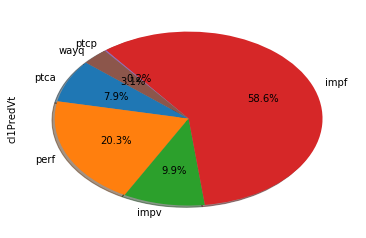

In [34]:
QRclean.cl1PredVt.value_counts(sort=False).plot.pie(autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

and now a bar chart ;-)

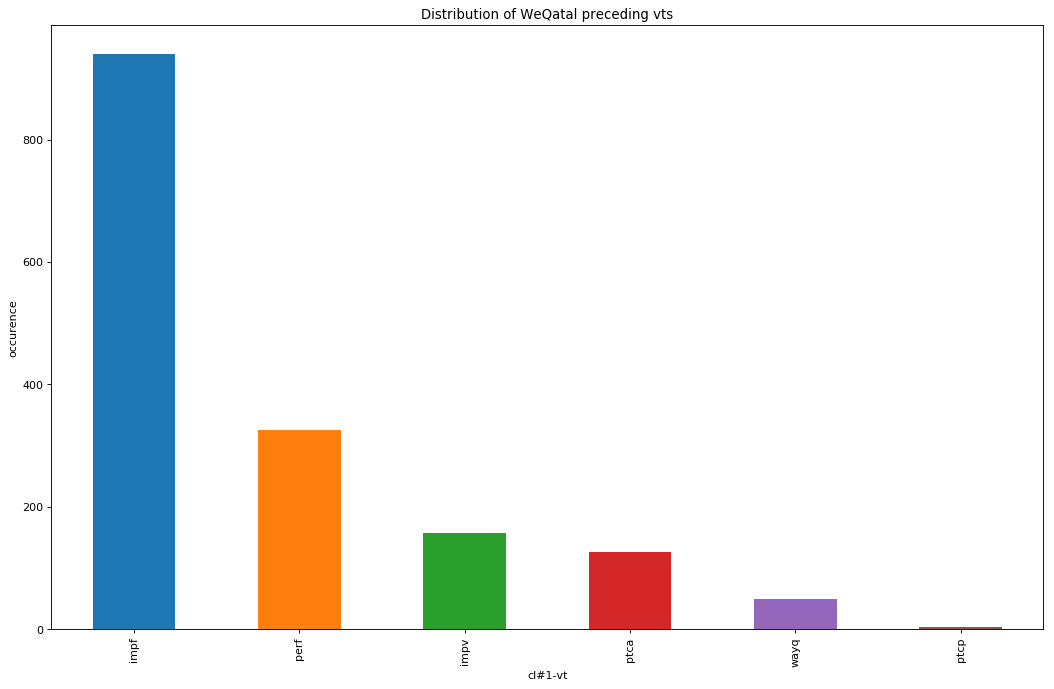

In [35]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
QRclean.groupby('cl1PredVt').size().sort_values(ascending=False).plot.bar()
plt.xlabel('cl#1-vt')
plt.ylabel('occurence')
plt.title('Distribution of WeQatal preceding vts')
plt.show()

Obviously no nominal predicates are included in the above bar and pie chart. Lets calculate how many predicate complement within NmCl must be there.

In [36]:
PreC = QRclean['cl1PredTyp']=='PreC'
allNmCl = QRclean['cl1Typ']=='NmCl'
print("There are", PreC.sum(), "words that appear in PreC phrases in nominal clauses that precede the WeQatal clause")
print("And there are a total of", allNmCl.sum() ,"nominal clauses preceding the WeQatal clause")
print("In conclusion there must be a total of 180 PreC phrases")

There are 315 words that appear in PreC phrases in nominal clauses that precede the WeQatal clause
And there are a total of 180 nominal clauses preceding the WeQatal clause
In conclusion there must be a total of 180 PreC phrases


## Investigating specific tense relations manually
I have now collected all the relevant data. The next step is to analyze the different WeQatal relations in order to investigate what verbal function WeQatal represents. This requires manual research. In order to carry this research out I will write the ```QRclean``` dataframe ```to_excel``` where I will carry out the research.

In [37]:
QRclean.to_excel (r'D:/OneDrive/1200_AUS-research/Fabric-TEXT/WeQatal-all_results.xlsx', index = None, header=True)

Most of the predicates that appear in clauses preceding the WeQatal clauses are:

|form    |count |
|--------|------|
|impf    | 940  |
|perf    | 325  |
|nominal | 185  |
|impv    | 158  |

Since this will not be an exhaustive study, I only inquire the most frequent relations in the following order:

|order |cl#1 => |cl#2   |
|------|--------|-------|
|1.    |xYq0    |WeQatal|
|2.    |WxY0    |WeQatal|
|3.    |NmCl    |WeQatal|
|4.    |WXYq    |WeQatal|
|5.    |ZIm0    |WeQatal|
|6.    |xQt0    |WeQatal|
|7.    |xQtX    |WeQatal|

I will only study the listed seven relations for the book of Genesis by classifying my findings in an additional column. Once I have finished my observations I will load the updated excel file into a dataframe and present my findings.

## Analysing the Form to Function results on the basis of previous manual research
After I have analyzed the clause relations for the book of Genesis I can load the data again as dataframe.

In [38]:
weqatalclasses=pd.read_excel('D:/OneDrive/1200_AUS-research/Fabric-TEXT/WeQatal-all_results_manual-research.xlsx')
weqatalclasses.head(2)

,order,book,chp,vrs,classification,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
0,1,Genesis,2,6,"consequential, logic progress",WXYq,וְאֵ֖ד יַֽעֲלֶ֣ה מִן־הָאָ֑רֶץ,WQt0,וְהִשְׁקָ֖ה אֶֽת־כָּל־פְּנֵֽי־הָֽאֲדָמָֽה׃,Pred,יַֽעֲלֶ֣ה,impf,Pred,הִשְׁקָ֖ה,perf,1
1,2,Genesis,2,10,"consequential, logic progress",WxY0,וּמִשָּׁם֙ יִפָּרֵ֔ד,WQt0,וְהָיָ֖ה לְאַרְבָּעָ֥ה רָאשִֽׁים׃,Pred,יִפָּרֵ֔ד,impf,Pred,הָיָ֖ה,perf,1


Since I have only studied the Form-Function relations within Genesis I will reduce the dataframe to just those cases.

In [39]:
GenWeQtl = weqatalclasses[weqatalclasses['book'].str.contains("Genesis")]
GenWeQtl.shape

(73, 16)

In [40]:
classifiers = GenWeQtl.groupby('classification').size().sort_values(ascending=False)
classifiers.head()

classification
consequential, future                14
consequential, command/wish          13
consequential, logic progress        10
consequential, conditional            7
consequential, sequence of action     5
dtype: int64

One of the most dominant function of the WeQatal clause is to describe future (events) or to commands. What formal relation does trigger such function?

### Future Meaning
Since the WeQatal clause does **always** function consequentially, i.e. it describes the consequence that follows that what is described in the preceeding clause, the consequence has (most of the time) "either logical or temporal" (BHRG, §21.3.1.1) future characteristic.
For example Gen 28:3:

| cl#2                                           |  cl#1            |
|------------------------------------------------|------------------|
|וְהָיִ֖יתָ לִקְהַ֥ל עַמִּֽים׃      |                                            וְיַרְבֶּ֑ךָ|
|And you (will) be an assembly of people/nations |And I multiply you|

But which preceding clause type and which preceding tense triggers such a function?

In [41]:
conseqFuture = GenWeQtl[GenWeQtl['classification'].str.contains("future")]
conseqFuture.count()

order             15
book              15
chp               15
vrs               15
classification    15
cl1Typ            15
cl1Txt            15
cl2Typ            15
cl2Txt            15
cl1PredTyp        15
cl1PredTxt        15
cl1PredVt          7
cl2PredTyp        15
cl2PredTxt        15
cl2PredVt         15
count             15
dtype: int64

There is a total of 15 clause relations that trigger the future meaning in the WeQatal. However there are onlz 7 clauses in which we find a verba predicate (cl-#1-pred-vt). What is that verbal predicate?

In [42]:
conseqFuture.groupby('cl1PredVt').size().sort_values(ascending=False)

cl1PredVt
impf    7
dtype: int64

In [43]:
conseqFuture.groupby('cl1Typ').size().sort_values(ascending=False)

cl1Typ
NmCl    8
xYqX    5
WYq0    2
dtype: int64

In verbal clauses the Yiqtol tense is the only tense that triggers consequential-future meaning in the WeQatal. But this is just 7 of a total of 15 cases. The remaining cases have a NmCl as preceding clause. For example Gen 26:24:

| cl#2                   |         cl#1       |
|------------------------|--------------------|
|וּבֵֽרַכְתִּ֨יךָ֙     |                כִּֽי־אִתְּךָ֣ אָנֹ֔כִי          |
|And I (will) bless you  | For with you (am) I|


In [44]:
# If I want to combine sorting and filtering as in Excel. In pandas we need to sort first, before we filter:
GenWeQtl.sort_values(['count', 'book'], ascending=False).head(10)
# and now grouping
classesClTyp = GenWeQtl.groupby(['classification', 'cl1Typ']).count()
classesClTyp.head(20)

order  book  chp  \
classification                                     cl1Typ                     
N/A because DS                                     NmCl        2     2    2   
                                                   ZIm0        1     1    1   
consequential, command/wish                        Ptcp        2     2    2   
                                                   WIm0        2     2    2   
                                                   WXYq        1     1    1   
                                                   WYq0        1     1    1   
                                                   WxY0        1     1    1   
                                                   ZIm0        3     3    3   
                                                   ZYqX        1     1    1   
                                                   xYq0        1     1    1   
                                                   xYqX        1     1    1   
consequential, command/wish, s1=factual languag... xQt0        1     1    1   
consequential, conditional                         xYq0        7     7    7   
consequential, contrast (not X but Y)              WxYX        1     1    1   
consequential, contrast, s1=factual language       Ptcp        1     1    1   
consequential, explanation, s1=factual language    xQt0        1     1    1   
consequential, future                              NmCl        7     7    7   
                                                   WYq0        2     2    2   
                                                   xYqX        5     5    5   
consequential, future with Q                       NmCl        1     1    1   

                                                           vrs  cl1Txt  \
classification                                     cl1Typ                
N/A because DS                                     NmCl      2       2   
                                                   ZIm0      1       1   
consequential, command/wish                        Ptcp      2       2   
                                                   WIm0      2       2   
                                                   WXYq      1       1   
                                                   WYq0      1       1   
                                                   WxY0      1       1   
                                                   ZIm0      3       3   
                                                   ZYqX      1       1   
                                                   xYq0      1       1   
                                                   xYqX      1       1   
consequential, command/wish, s1=factual languag... xQt0      1       1   
consequential, conditional                         xYq0      7       7   
consequential, contrast (not X but Y)              WxYX      1       1   
consequential, contrast, s1=factual language       Ptcp      1       1   
consequential, explanation, s1=factual language    xQt0      1       1   
consequential, future                              NmCl      7       7   
                                                   WYq0      2       2   
                                                   xYqX      5       5   
consequential, future with Q                       NmCl      1       1   

                                                           cl2Typ  cl2Txt  \
classification                                     cl1Typ                   
N/A because DS                                     NmCl         2       2   
                                                   ZIm0         1       1   
consequential, command/wish                        Ptcp         2       2   
                                                   WIm0         2       2   
                                                   WXYq         1       1   
                                                   WYq0         1       1   
                                                   WxY0         1       1  

Lets see what functions the impf tense can cause in WeQatal.

In [45]:
impf = GenWeQtl[GenWeQtl['cl1PredVt'] == 'impf']
impf.groupby('classification').count().sort_values('cl1Typ', ascending=False)

,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt,count
classification,,,,,,,,,,,,,,,
"consequential, logic progress",10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
"consequential, conditional",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
"consequential, future",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
"consequential, command/wish",6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
"consequential, sequence of action",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
"consequential, contrast (not X but Y)",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"consequential, narrative progress",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"consequential, promise",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"consequential, promise png shift",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


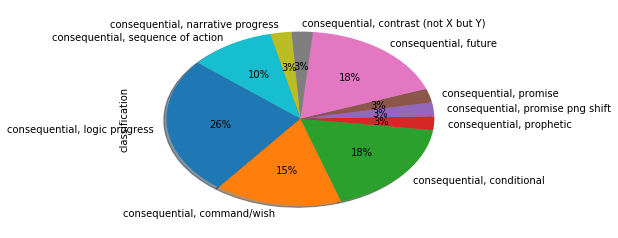

In [46]:
impf.classification.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

### Imperative Meaning
Another dominant function of the WeQatal clause is imperative (command/wish). What preceding clause type triggers such a function?

In [47]:
conseqImp = GenWeQtl[GenWeQtl['classification'].str.contains("com")]
conseqImp.count()

order             14
book              14
chp               14
vrs               14
classification    14
cl1Typ            14
cl1Txt            14
cl2Typ            14
cl2Txt            14
cl1PredTyp        14
cl1PredTxt        14
cl1PredVt         14
cl2PredTyp        14
cl2PredTxt        14
cl2PredVt         14
count             14
dtype: int64

# Stuff to work on yet...

## further sorting

In [262]:
GenWeQtl[GenWeQtl.cl1Typ == 'NmCl'].groupby(['classification', 'count']).count()

,,order,book,chp,vrs,cl1Typ,cl1Txt,cl2Typ,cl2Txt,cl1PredTyp,cl1PredTxt,cl1PredVt,cl2PredTyp,cl2PredTxt,cl2PredVt
classification,count,,,,,,,,,,,,,,
N/A because DS,1,2,2,2,2,2,2,2,2,2,2,0,2,2,2
"consequential, future",1,7,7,7,7,7,7,7,7,7,7,0,7,7,7
"consequential, future with Q",1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
"consequential, narrative progress",1,1,1,1,1,1,1,1,1,1,1,0,1,1,1


## Probabilities

## Visualization

In [ ]:
GenWeQtl['classification'].value_counts().plot(kind='barh')

ImpfWeQtl[ImpfWeQtl['classification'].str.contains("logic")].plot(kind='barh')

In [259]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

x = 'cl-#1-typ'
y = 'cl-#1-PredTyp'

plt.scatter(x=x, y=y, data=QRclean);

In [ ]:
# If I want to combine sorting and filtering as in Excel, 
GenWeQtl.sort_values(['chp', 'vrs'], ascending=True).head(10)
# and now grouping
classes = GenWeQtl.groupby(['classification', 'cl1Typ']).count()
classes.head(20)


# I first have to do the sorting command before I do the filtering command.
# GenWeQtl.sort_values('count', ascending=False).head(10)
# classes = GenWeQtl.groupby(['classification', 'cl1Typ']).count()
# classes.head(20)
#sort_values('count', ascending=False).head(7)

In [ ]:
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
GenWeQtl.groupby('classification').size().sort_values(ascending=False).plot.barh()
plt.xlabel('classifier')
plt.ylabel('occurence')
plt.title('Distribution of WeQatal Functions')
plt.show()

In [ ]:
GenWeQtl.groupby('cl-#1-pred-vt').size().sort_values(ascending=False)

In [ ]:
ImpfWeQtl = GenWeQtl.loc[GenWeQtl['cl-#1-pred-vt'] == 'impf']
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
ImpfWeQtl.groupby('classification').size().sort_values(ascending=False).plot.bar()
plt.xlabel('classifier')
plt.ylabel('occurence')
plt.title('Distribution of Impf=>WeQatal Functions')
plt.show()

PerfWeQtl = GenWeQtl.loc[GenWeQtl['cl-#1-pred-vt'] == 'perf']
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
PerfWeQtl.groupby('classification').size().sort_values(ascending=False).plot.bar()
plt.xlabel('classifier')
plt.ylabel('occurence')
plt.title('Distribution of Perf=>WeQatal Functions')
plt.show()

ImpvWeQtl = GenWeQtl.loc[GenWeQtl['cl-#1-pred-vt'] == 'impv']
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
ImpvWeQtl.groupby('classification').size().sort_values(ascending=False).plot.bar()
plt.xlabel('classifier')
plt.ylabel('occurence')
plt.title('Distribution of Perf=>WeQatal Functions')
plt.show()

PtcaWeQtl = GenWeQtl.loc[GenWeQtl['cl-#1-pred-vt'] == 'ptca']
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
PtcaWeQtl.groupby('classification').size().sort_values(ascending=False).plot.bar()
plt.xlabel('classifier')
plt.ylabel('occurence')
plt.title('Distribution of Perf=>WeQatal Functions')
plt.show()

In [ ]:
# https://stackoverflow.com/questions/15126679/plot-key-count-per-unique-value-count-in-pandas
test = GenWeQtl.value_counts(GenWeQtl['classification'])
test.plt.bar()

After seeing the occurence of the different classifiers I created I need to get statistical information about which WeQatal relation triggers which type of classifier.

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
g=sns.pairplot(GenWeQtl)
#sns.pairplot(GenWeQtl, x_vars=cl-#1-typ, y_vars='cl-#1-typ', kind='reg')

In [ ]:
plt.subplot(2,2,1)

plt.hist(uniform_dat.flatten(), bins=20)
plt.xlabel('$X$')
plt.ylabel('# Samples')
plt.title('Uniform Data Hist')
plt.grid(True)


plt.subplot(2,2,2)

plt.hist(uniform_aves, bins=20)
plt.xlabel('Average $X$')
plt.ylabel('# Averages')
plt.title('Uniform Data Averages Hist')
plt.grid(True)

plt.subplot(2,2,3)

plt.hist(poisson_dat.flatten(), bins=10)
plt.xlabel('$X$')
plt.ylabel('# Samples')
plt.title('Poisson Data Hist')
plt.grid(True)


plt.subplot(2,2,4)

plt.hist(poisson_aves, bins=10)
plt.xlabel('Average $X$')
plt.ylabel('# Averages')
plt.title('Poisson Data Averages Hist')
plt.grid(True)

Before loading the tsv file as a dataframe I did the following:
1. Manual cleaning up in excel
2. Adding a comments column in which I write down observations on the potential WeQatal function



# Questions to be asked
1. Are Person, Number, and Gender usually identical bewteen the WeQatal form and the previous verbal form?
2. How do the tenses relate in Discoursive texts vrs Narrative texts?

In [ ]:
A.table(resultsNo2, end=1, linked=4, withNodes=True, colorMap={1: 'yellow', 2: 'cyan', 3: 'magenta', 4: 'yellow', 5: 'cyan', 6: 'magenta', 7: 'magenta', })